# chapter 13 in chapter exercises

In [1]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 13.1: Visualization of confidence intervals

In [3]:
# a population and its mean
popdata = np.random.randn(100000) + 2
popmean = np.mean(popdata)

# samples and their confidence intervals
nSamples   = 20
sampleSize = 50

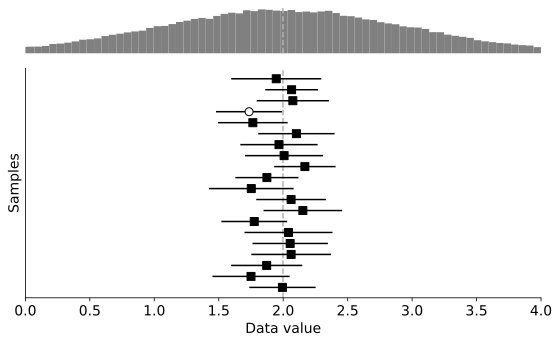

In [4]:
# setup the figure
fig = plt.figure(figsize=(8,5))
gs = plt.GridSpec(5,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1:])

# draw the population distribution and its mean
ax1.hist(popdata,bins='fd',color='gray')
ax1.axvline(x=popmean,linestyle='--',color=(.7,.7,.7))
ax2.axvline(x=popmean,linestyle='--',color=(.7,.7,.7))

# run the experiment
for i in range(nSamples):

  # draw a sample
  sample = np.random.choice(popdata,sampleSize,replace=False)

  # compute its mean and stdev
  mean = np.mean(sample)
  sem  = np.std(sample,ddof=1) / np.sqrt(sampleSize)

  # confidence interval from scipy
  CI = stats.t.interval(.95,sampleSize-1,loc=mean,scale=sem)

  # plot it
  if popmean>CI[0] and popmean<CI[1]:
    c,s = 'k','s'
  else:
    c,s = 'w','o'
  ax2.errorbar(mean,i,xerr=mean-CI[0],color='k',marker=s,markerfacecolor=c,markersize=8)



ax1.set_xlim([0,4])
ax1.axis('off')

ax2.set_ylabel('Samples')
ax2.set_yticks([])
ax2.set_xlim([0,4])
ax2.set_xlabel('Data value')

plt.tight_layout()
plt.show()

### Fig 13.2: confidence interval vs standard deviation

In [5]:
sampleSizes = [100,1000]
confLevel = .95


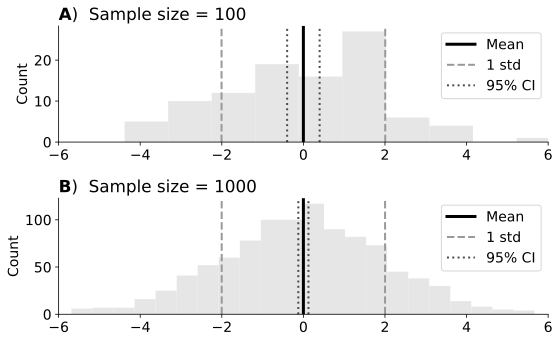

In [6]:
_,axs = plt.subplots(2,1,figsize=(8,5))


for ax,N,t in zip(axs,sampleSizes,['A','B']):

  # Generate a random sample of size N
  data = np.random.randn(N)*2
  # force the mean to be zero
  data -= np.mean(data)

  # mean and standard deviation
  mean = np.mean(data)
  stdev = np.std(data,ddof=1)

  # Calculate 95% confidence interval
  stderr = stdev / np.sqrt(len(data))
  conf_interval = stats.t.interval(confLevel, N-1, loc=mean, scale=stderr)




  # Plot the histogram
  ax.hist(data,bins='fd',color=(.9,.9,.9))

  # Plot the mean
  ax.axvline(mean,color='k',linewidth=3,label='Mean')

  # one standard deviation of the mean
  ax.axvline(mean-stdev,color=(.6,.6,.6),linewidth=2,linestyle='--',label='1 std')
  ax.axvline(mean+stdev,color=(.6,.6,.6),linewidth=2,linestyle='--')

  # Plot the confidence interval
  ax.axvline(conf_interval[0],color=(.3,.3,.3),linewidth=2,linestyle=':', label='95% CI')
  ax.axvline(conf_interval[1],color=(.3,.3,.3),linewidth=2,linestyle=':')

  ax.set(xlim=[-6,6],ylabel='Count')
  ax.set_title(rf'$\bf{{{t}}}$)  Sample size = {N}')
  ax.legend()



plt.tight_layout()
plt.show()

### Analytic confidence interval

In [7]:
conflevel = .95
n = 20
tStar = stats.t.isf((1-conflevel)/2,n-1)
print(tStar)

2.093024054408263


In [8]:
# simulation parameters
mean = 2.3
stdev = 3.2
N = 48
conflevel = .95

# confidence interval from formula
tStar = stats.t.isf((1-conflevel)/2,N-1)
conf_int_me = [ mean - tStar*(stdev/np.sqrt(N)), \
                mean + tStar*(stdev/np.sqrt(N)) ]

# confidence interval from scipy
conf_int_sp = stats.t.interval(confLevel,N-1,
                               loc=mean,scale=stdev/np.sqrt(N))

print(conf_int_me)
print(conf_int_sp)

[1.3708168597897181, 3.2291831402102815]
(1.3708168597897181, 3.2291831402102815)
